# `Fase #3 --> A/B Testing`

In [47]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv('DF_DATA#3.csv')
df.sample(5)

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month
205097,278568,2018,January,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Female,Bachelor,70846.0,Married,Star,7228.99,Standard,2018,8
324416,845176,2017,April,13,3,16,1456,145.0,333,27,Canada,British Columbia,Whistler,V6T 1Y8,Male,College,73479.0,Divorced,Nova,8007.40,Standard,2014,11
321847,222960,2018,August,5,0,5,475,47.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,91792.0,Married,Aurora,5207.99,Standard,2015,7
265186,260838,2018,February,7,3,10,2810,421.5,0,0,Canada,Quebec,Montreal,H2Y 4R4,Female,College,73479.0,Married,Aurora,6382.58,Standard,2016,1
92057,530436,2017,June,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,46663.0,Married,Nova,3252.83,Standard,2015,10


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  object 
 3   Flights_Booked               403760 non-null  int64  
 4   Flights_with_Companions      403760 non-null  int64  
 5   Total_Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points_Accumulated           403760 non-null  float64
 8   Points_Redeemed              403760 non-null  int64  
 9   Dollar_Cost_Points_Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

#### Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
    
Objetivo del Ejercicio: se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes.
Para ello, los pasos que deberas seguir son:

1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las
columnas relevantes: `'Flights Booked' y 'Education'`.


In [50]:
level_education_fly = df[['Education', 'Flights_Booked']]
level_education_fly

,Education,Flights_Booked
0,Bachelor,3
1,College,10
2,College,6
3,Bachelor,0
4,Bachelor,0
...,...,...
403755,College,0
403756,Doctor,0
403757,Bachelor,3
403758,College,0


In [101]:
level_education_fly['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [52]:
# Agrupar los datos por nivel educativo y calcular estadísticas descriptivas
group_edu = level_education_fly.groupby('Education')['Flights_Booked'].sum().reset_index
group_edu

<bound method Series.reset_index of Education
Bachelor                1038123
College                  426398
Doctor                    74036
High School or Below      78993
Master                    51614
Name: Flights_Booked, dtype: int64>

In [84]:
# Agrupar los datos por nivel educativo y calcular estadísticas descriptivas
group_edu_mediana = level_education_fly.groupby('Education')['Flights_Booked'].median().reset_index
group_edu_mediana

<bound method Series.reset_index of Education
Bachelor                1.0
College                 1.0
Doctor                  1.0
High School or Below    1.0
Master                  1.0
Name: Flights_Booked, dtype: float64>


2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas
descriptivas básicas (como el promedio, la desviación
estandar, los percentiles) del número de vuelos reservados
para cada grupo.


In [53]:
# Agrupar los datos por nivel educativo y calcular estadísticas descriptivas
descriptive_stats = level_education_fly.groupby('Education')['Flights_Booked'].describe().round(2)
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,252567.0,4.11,5.22,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.17,5.25,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.18,5.26,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.18,5.24,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.20,5.21,0.0,0.0,1.0,8.0,21.0


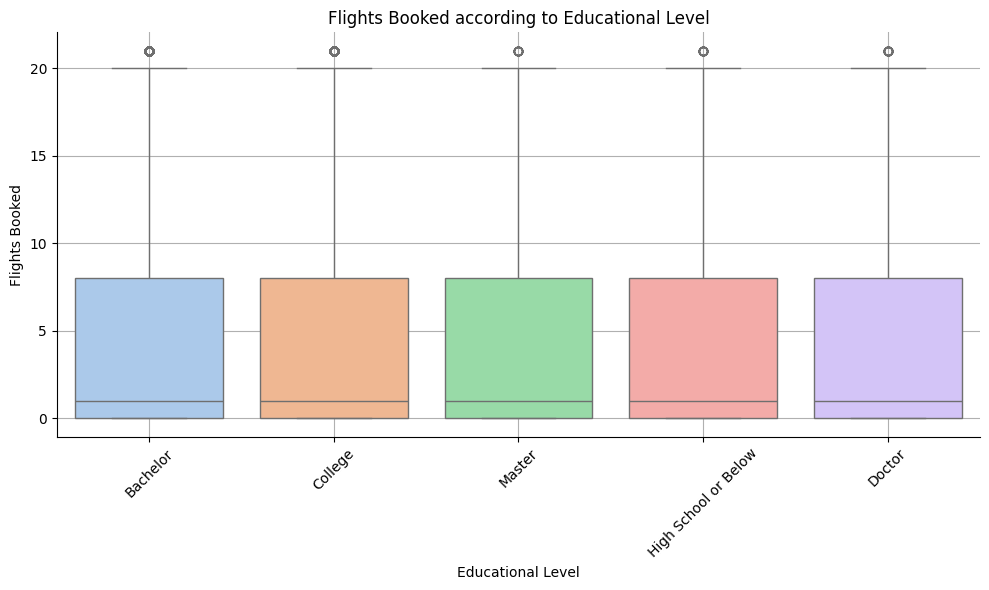

In [54]:
# Establecer el tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Crear el violin plot
sns.boxplot(data=level_education_fly, x="Education", y="Flights_Booked", palette="pastel")

# Ajustar título y etiquetas
plt.title('Flights Booked according to Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Flights Booked')
plt.xticks(rotation=45)
plt.grid(True)

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;
# Ajustar el diseño para que las etiquetas no se solapen
plt.tight_layout()
# Mostrar la gráfica
plt.show()


3. Prueba Estadística:
Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.
 
    Hipótesis: 

 - `HO` --> No existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. 
 - `H1` --> Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [79]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Con relación a {columna} los datos siguen una distribución normal.")
    else:
        print(f"Con relación a {columna} los datos no siguen una distribución normal.")

In [83]:
# Evaluar la normalidad para cada nivel de educación
for education_level in df['Education'].unique():
    print(f"Evaluando normalidad en el nivel educativo:--> {education_level} (p-value = {p_value:.5f})")
    normalidad(df[df['Education'] == education_level], 'Flights_Booked')

Evaluando normalidad en el nivel educativo:--> Bachelor (p-value = 0.00152)
Con relación a Flights_Booked los datos no siguen una distribución normal.
Evaluando normalidad en el nivel educativo:--> College (p-value = 0.00152)
Con relación a Flights_Booked los datos no siguen una distribución normal.
Evaluando normalidad en el nivel educativo:--> Master (p-value = 0.00152)
Con relación a Flights_Booked los datos no siguen una distribución normal.
Evaluando normalidad en el nivel educativo:--> High School or Below (p-value = 0.00152)
Con relación a Flights_Booked los datos no siguen una distribución normal.
Evaluando normalidad en el nivel educativo:--> Doctor (p-value = 0.00152)
Con relación a Flights_Booked los datos no siguen una distribución normal.


In [96]:

def homogeneidad (dataframe, columna, columna_metrica):
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [105]:
# Llamar a la función homogeneidad para la columna 'Education' y la métrica 'Flights_Booked'
for educations in level_education_fly:
    print(f"Evaluando homogeneidad en el nivel educativo: {education_level}")
    homogeneidad(df[df['Education'] == educations], 'Education', 'Flights_Booked')


Evaluando homogeneidad en el nivel educativo: Bachelor


ValueError: Must enter at least two input sample vectors.

In [77]:
# Realizar la prueba de Kruskal-Wallis
groups = [df[df['Education'] == education_level]['Flights_Booked'] for education_level in df['Education'].unique()]
stat, p_value = stats.kruskal(*groups)

print(f'Estadístico de Kruskal-Wallis: {stat:.5f}')
print(f'Valor p: {p_value:.5f}')

if p_value < 0.05:
    print("Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.")
else:
    print("No existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.")


Estadístico de Kruskal-Wallis: 17.53262
Valor p: 0.00152
Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.
